In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns

In [3]:
#Now the 'k'th subject's data will be pasted on study(or test)_list['k'] 

study_list = [None]
test_list = [None]

for l in range(31):
    if l <= 8:
        study_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_study.txt'.format(l+1,l+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))
    else :
        study_list.append(pd.read_csv('./DMdata/DM{}/DM{}_study.txt'.format(l+1,l+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))

for k in range(31):
    if k <= 8:
        test_list.append(pd.read_csv('./DMdata/DM0{}/DM0{}_test.txt'.format(k+1,k+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))
    else :
        test_list.append(pd.read_csv('./DMdata/DM{}/DM{}_test.txt'.format(k+1,k+1), sep = "\t", engine='python', encoding = "cp949", index_col = False))

#display the 2nd subject's study data
display(study_list[2])
#print the 17th subject's test data
print(test_list[17])

,Trial,ObjID,LocID,FB,Task,RT,Stim
0,1,44,3,1,-2,1500,4015
1,2,126,1,1,-2,1500,10027
2,3,185,2,1,-2,1283,16025
3,4,86,4,1,-2,632,24023
4,5,137,2,1,-2,965,32021
...,...,...,...,...,...,...,...
259,260,199,4,1,-1,616,695931
260,261,250,3,1,-1,1015,701930
261,262,4,2,1,-1,615,709928
262,263,128,4,1,-1,750,715925


     Trial  Object_ID  Task_Type  Stim_onset1   RT1  Res1  Stim_onset2   RT2  \
0        1        213          0         1006  2224     1         4966   565   
1        2        236          1         6664   761     4            0     0   
2        3         35          0        10176   329     1        12240   365   
3        4        217          0        13621   828     1        16185  1630   
4        5        128          0        18948   795     1        21478   514   
..     ...        ...        ...          ...   ...   ...          ...   ...   
523    524        146          0      1780321   245     1      1782302   182   
524    525        189          1      1783617   395     4            0     0   
525    526         10          1      1786763   612     4            0     0   
526    527        160          1      1790125   528     4            0     0   
527    528        170          1      1793404   312     4            0     0   

     Res2  
0       4  
1       0  
2  

In [4]:
conditions = [None]

values = ['HIT-HC', 'HIT-LC', 'MISS-LC', 'MISS-HC', 'FA-HC', 'FA-LC', 'CR-LC', 'CR-HC']
for h in range(31):
    conditions.append([(test_list[h+1]['Task_Type']==a) & (test_list[h+1]['Res1']==b) for b in range(1,5) for a in range(2)])

for i in range(31):
    test_list[i+1]["Res_Type"]= np.select(conditions[i+1], values)
    
print(test_list[1])

print(test_list[2])

     Trial  Object_ID  Task_Type  Stim_onset1   RT1  Res1  Stim_onset2   RT2  \
0        1         72          1         1017  3863     2            0     0   
1        2        122          1         7632  3480     4            0     0   
2        3        114          1        13866  1264     3            0     0   
3        4        108          0        17882  1464     1        21083  3549   
4        5        145          0        25765  1631     1        29133  1032   
..     ...        ...        ...          ...   ...   ...          ...   ...   
523    524         93          1      2369157   597     3            0     0   
524    525        144          1      2372507  3264     3            0     0   
525    526        164          0      2378523   714     1      2380975   615   
526    527         98          0      2382607   631     1      2384975   398   
527    528         51          0      2386507   764     1      2389008  2565   

     Res2 Res_Type  
0       0  MISS-HC

In [45]:
##31 subject's res_type data

HitnMiss = values[:4]
CRnFA = values[4:]
MScores = [None]

for k in range(1,32):
    old = test_list[k][test_list[k]['Res_Type'].isin(HitnMiss)]['Res_Type'].value_counts(normalize=True)
    new = test_list[k][test_list[k]['Res_Type'].isin(CRnFA)]['Res_Type'].value_counts(normalize=True)
    df = pd.concat([old,new], axis = 0)
    X = pd.Series(df, name="Memory Scores").to_frame()
    X.index.name = 'Res Type'
    Y = X.reindex(index=values)
    MScores.append(Y.reset_index())
    

,Res Type,Memory Scores
0,HIT-HC,0.716599
1,HIT-LC,0.032389
2,MISS-LC,0.149798
3,MISS-HC,0.101215
4,FA-HC,0.099644
5,FA-LC,0.323843
6,CR-LC,0.078292
7,CR-HC,0.498221


Define some functions

In [30]:
def subject_MScore(id):
    return MScores[id]

subject_MScore(5)

0    0.504065
1    0.060976
2    0.231707
3    0.203252
4    0.063830
5    0.099291
6    0.230496
7    0.606383
Name: Memory Scores, dtype: float64

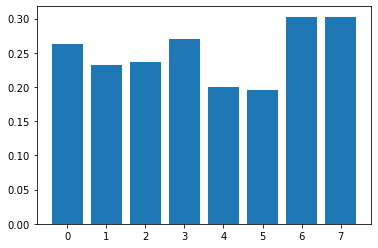

In [15]:
def subject_MScore_bar(id):
    plt.bar(MScores[id].index, MScores[id]['Memory Scores'])

subject_MScore_bar(21)
    

Memory Scores

-plotting the mean and std of entire subject data

In [85]:
tmp = [subject_MScore(i) for i in range(1,32)]
Bulk = pd.concat(tmp)
Bulk["Task Type"] = Bulk["Res Type"].isin(HitnMiss)
Bulk['Task Type'] = Bulk['Task Type'].replace([True],'Old')
Bulk['Task Type'] = Bulk['Task Type'].replace([False],'New')

,Res Type,Memory Scores,Task Type
0,HIT-HC,0.716599,Old
1,HIT-LC,0.032389,Old
2,MISS-LC,0.149798,Old
3,MISS-HC,0.101215,Old
4,FA-HC,0.099644,New


In [67]:
#### concatenate 31 subject data horizontally to plot the mean and std plot

'''''tmp = [subject_MScore(i)['Memory Scores'] for i in range(1,32)]

entire_data = pd.concat(tmp, axis = 1)
mean_MScores = entire_data.mean(axis = 1)
X = pd.Series(mean_MScores, name="Memory Scores").to_frame()
X['Res Type'] =  values
X = X[['Res Type', 'Memory Scores']]
print(X)


std_MScores = entire_data.std(axis = 1)
Y = pd.Series(mean_MScores, name="Memory Scores").to_frame()
Y['Res Type'] =  values
Y = Y[['Res Type', 'Memory Scores']]
print(Y)'''''


  Res Type  Memory Scores
0   HIT-HC       0.515607
1   HIT-LC       0.069818
2  MISS-LC       0.239674
3  MISS-HC       0.181658
4    FA-HC       0.186274
5    FA-LC       0.329669
6    CR-LC       0.123665
7    CR-HC       0.360392
  Res Type  Memory Scores
0   HIT-HC       0.515607
1   HIT-LC       0.069818
2  MISS-LC       0.239674
3  MISS-HC       0.181658
4    FA-HC       0.186274
5    FA-LC       0.329669
6    CR-LC       0.123665
7    CR-HC       0.360392


version 1

Text(0, 0.5, 'Response rate')

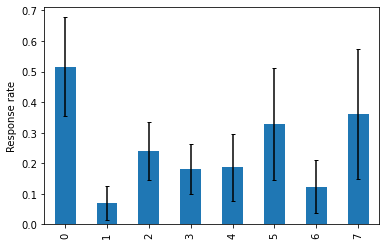

In [62]:
fig, ax = plt.subplots()
mean_MScores.plot(kind='bar', ax=ax, yerr=std_MScores, capsize = 2)
plt.ylabel('Response rate')

version 2

Text(0, 0.5, 'Response rate')

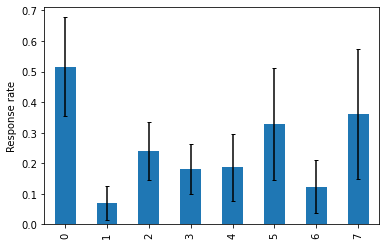

In [63]:
mean_MScores.plot(kind='bar', yerr=std_MScores, capsize = 2)
plt.ylabel('Response rate')

Memory Scores

-plotting the source memory correct rate of entire subject data

version 3

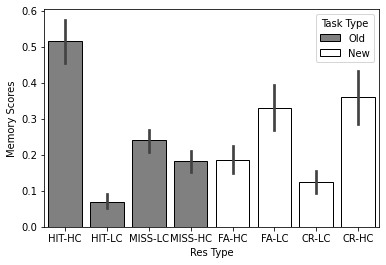

In [91]:
palette ={"Old": "gray", "New": "white"}
ax = sns.barplot(x="Res Type", y="Memory Scores", hue="Task Type", data=Bulk, palette = palette, dodge=False, edgecolor='k')


In [10]:
#### source memory correct rate